In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

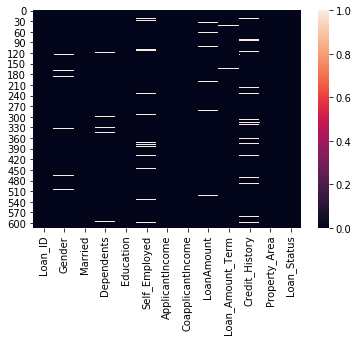

In [6]:
sns.heatmap(data.isnull())

In [7]:

data['Loan_Amount_Term'] = np.where(data['Loan_Amount_Term'] ==360,180,360) #Change the Class representation
data['Loan_Amount_Term'].value_counts() #Class distribution

data['Dependents'] = np.where(data['Dependents'] ==2,0,1) #Change the Class representation
data['Dependents'].value_counts() #Class distribution


1    614
Name: Dependents, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
data['Self_Employed']=LabelEncoder().fit_transform(data['Self_Employed'].tolist())
data['Married']=LabelEncoder().fit_transform(data['Married'].tolist())
data['Gender']=LabelEncoder().fit_transform(data['Gender'].tolist())
data['Education']=LabelEncoder().fit_transform(data['Education'].tolist())
data['Property_Area']=LabelEncoder().fit_transform(data['Property_Area'].tolist())

data['Loan_Status']=LabelEncoder().fit_transform(data['Loan_Status'].tolist())
data['Loan_Status']=LabelEncoder().fit_transform(data['Loan_Status'].tolist())

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,1,0,0,5849,0.0,NaN,180,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,180,1.0,0,0
2,LP001005,1,1,1,0,1,3000,0.0,66.0,180,1.0,2,1
3,LP001006,1,1,1,1,0,2583,2358.0,120.0,180,1.0,2,1
4,LP001008,1,0,1,0,0,6000,0.0,141.0,180,1.0,2,1


In [9]:
data['Self_Employed'] = np.where(data['Self_Employed'] ==1,0,1) #Change the Class representation
data['Self_Employed'].value_counts() #Class distribution

data['Credit_History'] = np.where(data['Credit_History'] ==1,0,1) #Change the Class representation
data['Credit_History'].value_counts() #Class distribution

0    475
1    139
Name: Credit_History, dtype: int64

In [10]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data.fillna(data.mean(),inplace=True)

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
data.shape

(614, 13)

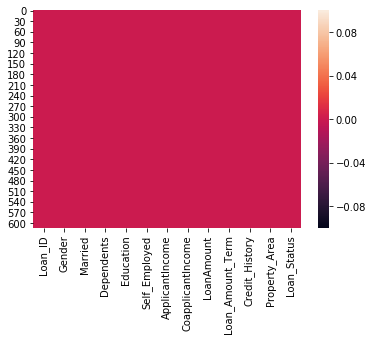

In [13]:
sns.heatmap(data.isnull())

In [14]:
x=data.iloc[:,1:-1]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,1,0,1,5849,0.0,146.412162,180,0,2
1,1,1,1,0,1,4583,1508.0,128.000000,180,0,0
2,1,1,1,0,0,3000,0.0,66.000000,180,0,2
3,1,1,1,1,1,2583,2358.0,120.000000,180,0,2
4,1,0,1,0,1,6000,0.0,141.000000,180,0,2


In [15]:
y=data.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=40)

In [31]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7941176470588235
[[15 20]
 [ 8 93]]
              precision    recall  f1-score   support

           0       0.65      0.43      0.52        35
           1       0.82      0.92      0.87       101

    accuracy                           0.79       136
   macro avg       0.74      0.67      0.69       136
weighted avg       0.78      0.79      0.78       136



In [32]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7426470588235294
[[  0  35]
 [  0 101]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.74      1.00      0.85       101

    accuracy                           0.74       136
   macro avg       0.37      0.50      0.43       136
weighted avg       0.55      0.74      0.63       136



In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))

print(classification_report(y_test,predrf))

0.7352941176470589
[[18 17]
 [19 82]]
              precision    recall  f1-score   support

           0       0.49      0.51      0.50        35
           1       0.83      0.81      0.82       101

    accuracy                           0.74       136
   macro avg       0.66      0.66      0.66       136
weighted avg       0.74      0.74      0.74       136



In [34]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.6838235294117647
[[16 19]
 [24 77]]
              precision    recall  f1-score   support

           0       0.40      0.46      0.43        35
           1       0.80      0.76      0.78       101

    accuracy                           0.68       136
   macro avg       0.60      0.61      0.60       136
weighted avg       0.70      0.68      0.69       136



In [36]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7426470588235294
[[12 23]
 [12 89]]
              precision    recall  f1-score   support

           0       0.50      0.34      0.41        35
           1       0.79      0.88      0.84       101

    accuracy                           0.74       136
   macro avg       0.65      0.61      0.62       136
weighted avg       0.72      0.74      0.73       136



In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [38]:
kf = KFold(n_splits=5,shuffle=True, random_state=123)

In [39]:
cv_scores = cross_val_score(lr,x_train,y_train,cv=kf)
cv_scores

array([0.72916667, 0.80208333, 0.625     , 0.82105263, 0.78947368])

In [40]:
kf = KFold(n_splits=10,shuffle=True, random_state=123)
cv_scores = cross_val_score(lr,x_train,y_train,cv=kf)
cv_scores

array([0.66666667, 0.79166667, 0.79166667, 0.8125    , 0.625     ,
       0.64583333, 0.89583333, 0.75      , 0.80851064, 0.78723404])

In [41]:
from sklearn.ensemble import AdaBoostClassifier
adb= AdaBoostClassifier()
adb.fit(x_train,y_train)
adb.score(x_train,y_train)
predadb=rf.predict(x_test)
print(accuracy_score(y_test,predadb))
print(confusion_matrix(y_test,predadb))

print(classification_report(y_test,predadb))

0.7352941176470589
[[18 17]
 [19 82]]
              precision    recall  f1-score   support

           0       0.49      0.51      0.50        35
           1       0.83      0.81      0.82       101

    accuracy                           0.74       136
   macro avg       0.66      0.66      0.66       136
weighted avg       0.74      0.74      0.74       136



In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=dt.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))

print(classification_report(y_test,predgbc))

0.6838235294117647
[[16 19]
 [24 77]]
              precision    recall  f1-score   support

           0       0.40      0.46      0.43        35
           1       0.80      0.76      0.78       101

    accuracy                           0.68       136
   macro avg       0.60      0.61      0.60       136
weighted avg       0.70      0.68      0.69       136



In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6617647058823529
[[ 5 30]
 [16 85]]
              precision    recall  f1-score   support

           0       0.24      0.14      0.18        35
           1       0.74      0.84      0.79       101

    accuracy                           0.66       136
   macro avg       0.49      0.49      0.48       136
weighted avg       0.61      0.66      0.63       136



From Applying all the algorithm we can conclude that 
we get 75% score from Logistic regression and
from Random variable Algo we get the Accuracy 60 to 90%.